# Spatial Feature Engineering (II)

## Map Synthesis

## 📖 Ahead of time...

In this second part of Spatial Feature Engineering, we turn to Map Synthesis. There is only one reading to complete for this block, [Chapter 12](https://geographicdata.science/book/notebooks/12_feature_engineering.html) of the GDS Book {cite}`reyABwolf`. This block of Spatial Feature Engineering in this course loosely follows the second part of the chapter ([Map Synthesis](https://geographicdata.science/book/notebooks/12_feature_engineering.html#feature-engineering-using-map-synthesis)).

## 💻 Hands-on coding

In [17]:
import pandas, geopandas


```{margin} Data
If you want to read more about the data sources behind this dataset, head to the [Datasets](../data/datasets) section
```



````{tabbed} Local files

Assuming you have the file locally on the path `../data/`: 

```python
pts = geopandas.read_file("../data/madrid_abb.gpkg")
```
````

````{tabbed} Online read

If you're online, you can do:

```python
pts = geopandas.read_file(
    "https://github.com/GDSL-UL/san/raw/v0.1.0/data/assignment_1_madrid/madrid_abb.gpkg"
)
```
````

In [2]:
pts = geopandas.read_file("../data/madrid_abb.gpkg")

We will be working with a modified version of `pts`:

- Since we will require distance calculations, we will switch to the Spanish official projection
- To make calculations in the illustration near-instantaneous, we will work with a smaller (random) sample of Airbnb properties (20% of the total)

In [11]:
db = pts.sample(
    frac=0.1, random_state=123
).to_crs(epsg=25830)

As you can see in the description, the new CRS is expressed in metres:

In [12]:
db.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°W to 0°W and ETRS89 by country
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Distance buffers

*How many Airbnb's are within 500m of each Airbnb?*

In [13]:
from pysal.lib import weights

Using `DistanceBand`, we can build a spatial weights matrix that assigns `1` to each observation within 500m, and `0` otherwise.

In [15]:
w500m = weights.DistanceBand.from_dataframe(
    db, threshold=500, binary=True
)

The number of neighbors can be accessed through the `cardinalities` attribute:

In [18]:
n_neis = pandas.Series(w500m.cardinalities)
n_neis.head()

11297    213
2659       5
16242     21
15565      9
14707    159
dtype: int64

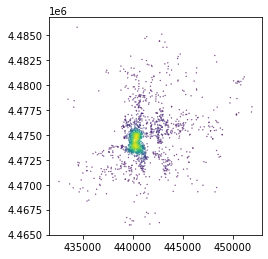

In [21]:
db.assign(
    n_neis=n_neis
).plot("n_neis", markersize=0.1);

### Distance rings

### Cluster membership (points)

### Cluster membership (polygons)

## 🐾 Next steps

If you want a bit more background into some of the techniques reviewed in this block, the following might be of interest:

- [Block E](http://darribas.org/gds_course/content/bE/concepts_E.html) of the GDS Course {cite}`darribas_gds_course` will introduce you to more techniques like the LISAs seen above to explore the spatial dimension of the statistical properties of your data. If you want a more detailed read, [Chapter 4](https://geographicdata.science/book/notebooks/04_spatial_weights.html) of the GDS Book {cite}`reyABwolf` will do just that.
- [Block F](http://darribas.org/gds_course/content/bF/concepts_F.html) of the GDS Course {cite}`darribas_gds_course` will introduce you to more techniques like the LISAs seen above to explore the spatial dimension of the statistical properties of your data. If you want a more detailed read, [Chapter 7](https://geographicdata.science/book/notebooks/07_local_autocorrelation.html) of the GDS Book {cite}`reyABwolf` will do just that.
- [Block H](http://darribas.org/gds_course/content/bH/concepts_H.html) of the GDS Course {cite}`darribas_gds_course` will introduce you to more techniques for exploring point patterns. If you want a more comprehensive read, [Chapter 8](https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html) of the GDS Book {cite}`reyABwolf` will do just that.